In [98]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

class FindBall:
    def __init__(self, img):
        self.img = cv2.imread(img)
        self.gray = cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY)

    def find_ellipses(self):
        
        # Threshold the image set between 0(high tolerance) and 255(low tolerance)
        ret, thresh = cv2.threshold(self.gray, 0, 255, 0)
        
        # Find contours
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Check if contours are found
        if len(contours) != 0:
            # Iterate through contours
            for cont in contours:
                if len(cont) < 5:
                    break
                # Fit ellipse to contour
                ellipse = cv2.fitEllipse(cont)
                return ellipse  # Return the first fitted ellipse
        return None


    def create_ellipse(self, ellipse):
        # Draw ellipse on image
        # Draw ellipse on image
        img_with_ellipse = cv2.ellipse(self.img.copy(), ellipse, (0, 255, 0), 2)
        
        # Get center coordinates of the ellipse
        center = (int(ellipse[0][0]), int(ellipse[0][1]))
        
        # Draw black dot at the center
        cv2.circle(img_with_ellipse, center, 5, (0, 0, 0), -1)  # -1 to fill the circle
        
        return img_with_ellipse


    def fit_ellipse(self):

        # Find ellipse
        ellipse = self.find_ellipses()

        # Draw ellipse on original image
        if ellipse is not None:
            img_with_ellipse = self.create_ellipse(ellipse)

            # Convert BGR image to RGB (matplotlib uses RGB)
            img_with_ellipse_rgb = cv2.cvtColor(img_with_ellipse, cv2.COLOR_BGR2RGB)

            # Display the image with ellipse using matplotlib
            plt.imshow(img_with_ellipse_rgb)
            plt.axis('off')  # Turn off axis
            plt.show()
        else:
            print("No ellipse found.")
        
        return ellipse
    

    def calculate_original(self):

        ellipse = self.fit_ellipse()
        x1, y1 = ellipse[0]
        alpha = ellipse[2] - 90 # switch to x axis
        s,l = ellipse[1]
        x2 = x1 + (l-s)*np.cos(alpha)
        y2 = y1 + (l-s)*np.sin(alpha)
        

        print(f"x1: {x1}\ny1: {y1}\nl: {l}\ns: {s}\nα: {alpha}\n\nx2: {x2}\ny2: {y2}")
        return (x2,y2)




In [99]:
oval = FindBall('oval.png')

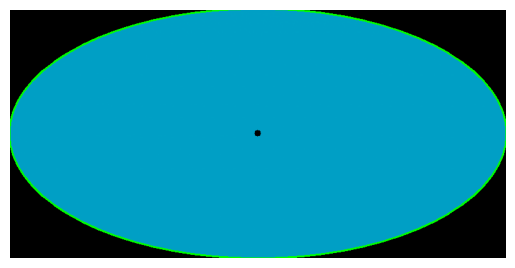

x1: 399.4985046386719
y1: 199.5001220703125
l: 802.0917358398438
s: 401.2516784667969
α: 6.866455078125e-05

x2: 800.3385610667742
y2: 199.52764557276552


(800.3385610667742, 199.52764557276552)

In [100]:
oval.calculate_original()